## about 

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

## List of columns

### sex: male or female

### age: age of the patient

### currentSmoker: whether or not the patient is a current smoker 

### cigsPerDay: the number of cigarettes that the person smoked on average in one day

### BPMeds: whether or not the patient was on blood pressure medication 

### prevalentStroke: whether or not the patient had previously had a stroke 

### prevalentHyp: whether or not the patient was hypertensive 

### diabetes: whether or not the patient had diabetes 

### totChol: total cholesterol level 

### sysBP: systolic blood pressure 

### diaBP: diastolic blood pressure 

### BMI: Body Mass Index 

### heartRate: heart rate 
### glucose: glucose level 

## TARGET COLUMN:

### 10 year risk of coronary heart disease CHD 

# importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,roc_curve, auc,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

# data set

In [2]:
data=pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
data.isnull().sum()/data.shape[0]*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.corrwith(data['TenYearCHD'])*100


male                 8.842757
age                 22.525610
education           -5.405896
currentSmoker        1.945627
cigsPerDay           5.788426
BPMeds               8.748858
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.218428
sysBP               21.642904
diaBP               14.529910
BMI                  7.519193
heartRate            2.291261
glucose             12.554400
TenYearCHD         100.000000
dtype: float64

<AxesSubplot:>

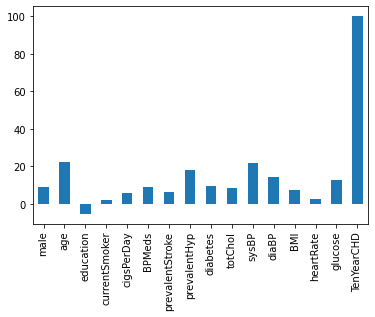

In [9]:
(data.corrwith(data['TenYearCHD'])*100).plot(kind='bar')

# correlation of target column with current smoker and heartrate is very low 

In [10]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

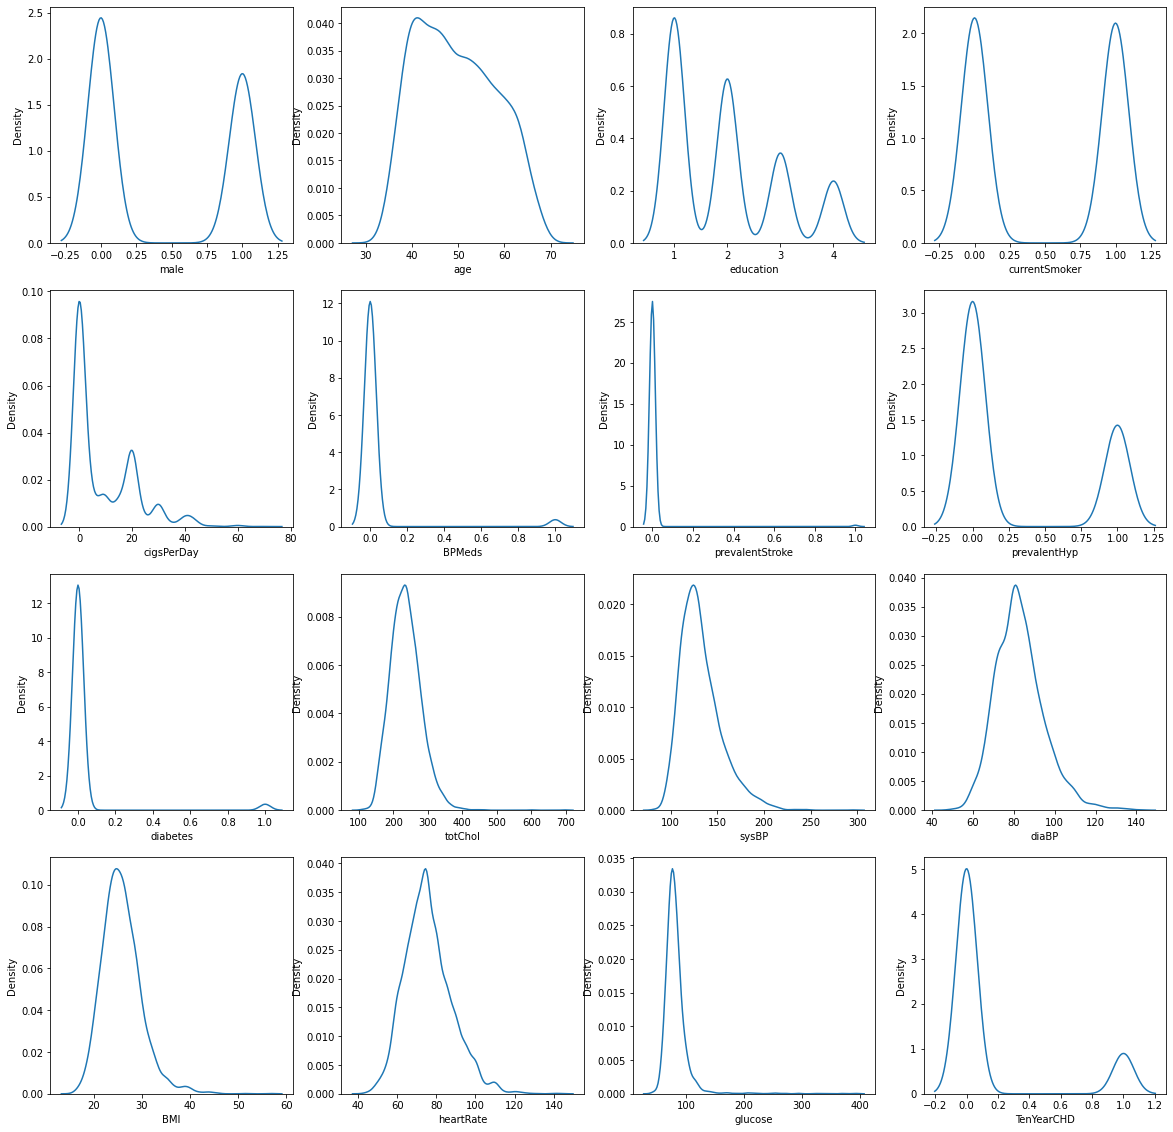

In [11]:
l=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(data[l[i-1]],hist=False)

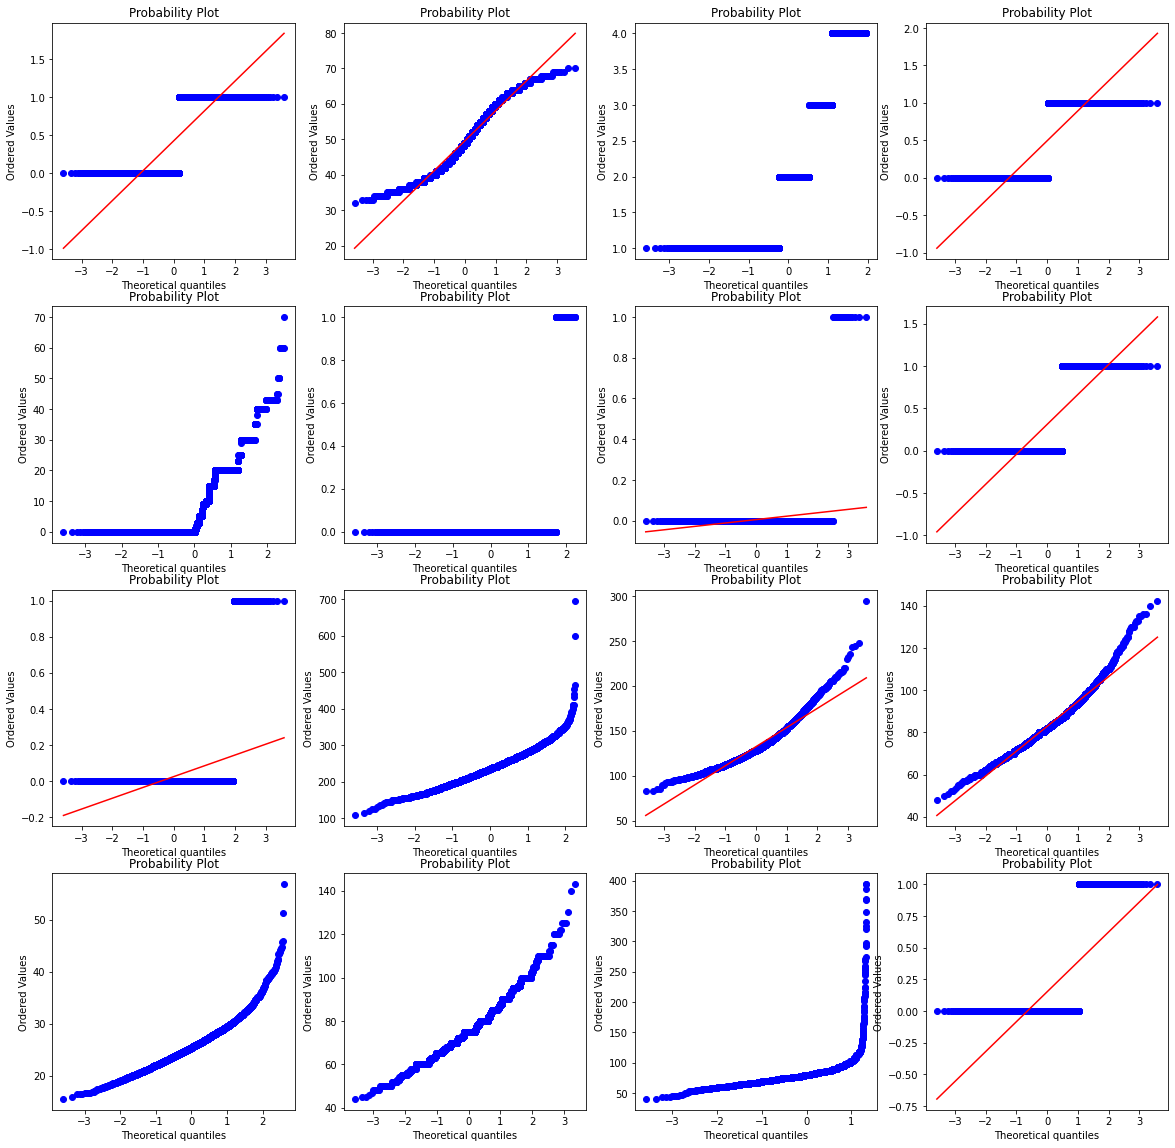

In [12]:
l=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    stats.probplot(data[l[i-1]],dist='norm',plot=plt)

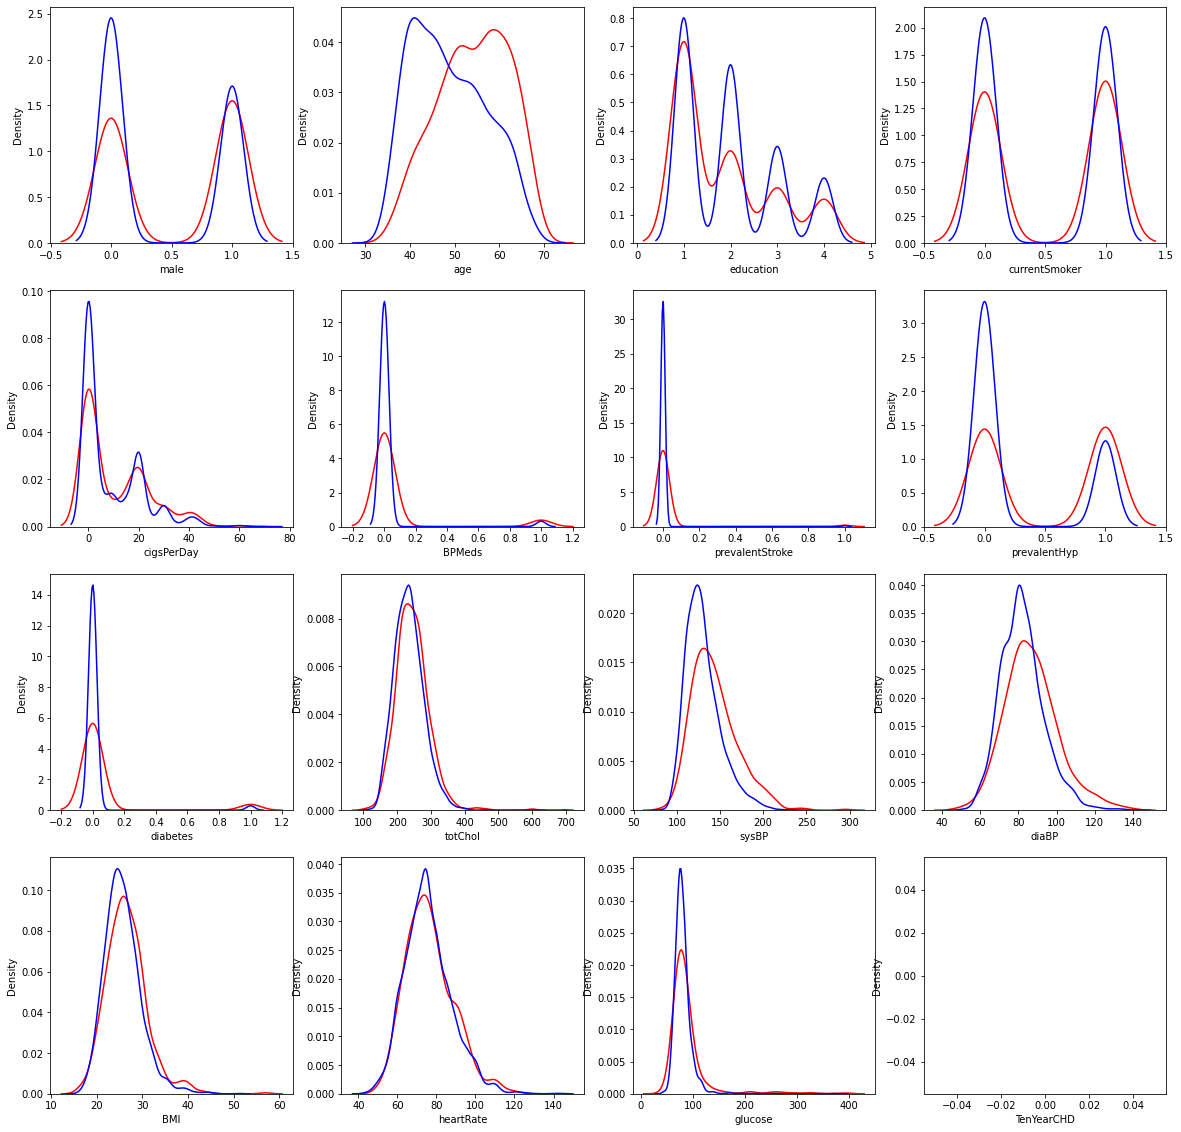

In [13]:
l=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(data[data['TenYearCHD']==1][l[i-1]],hist=False,color='red')
    sns.distplot(data[data['TenYearCHD']==0][l[i-1]],hist=False,color='blue')

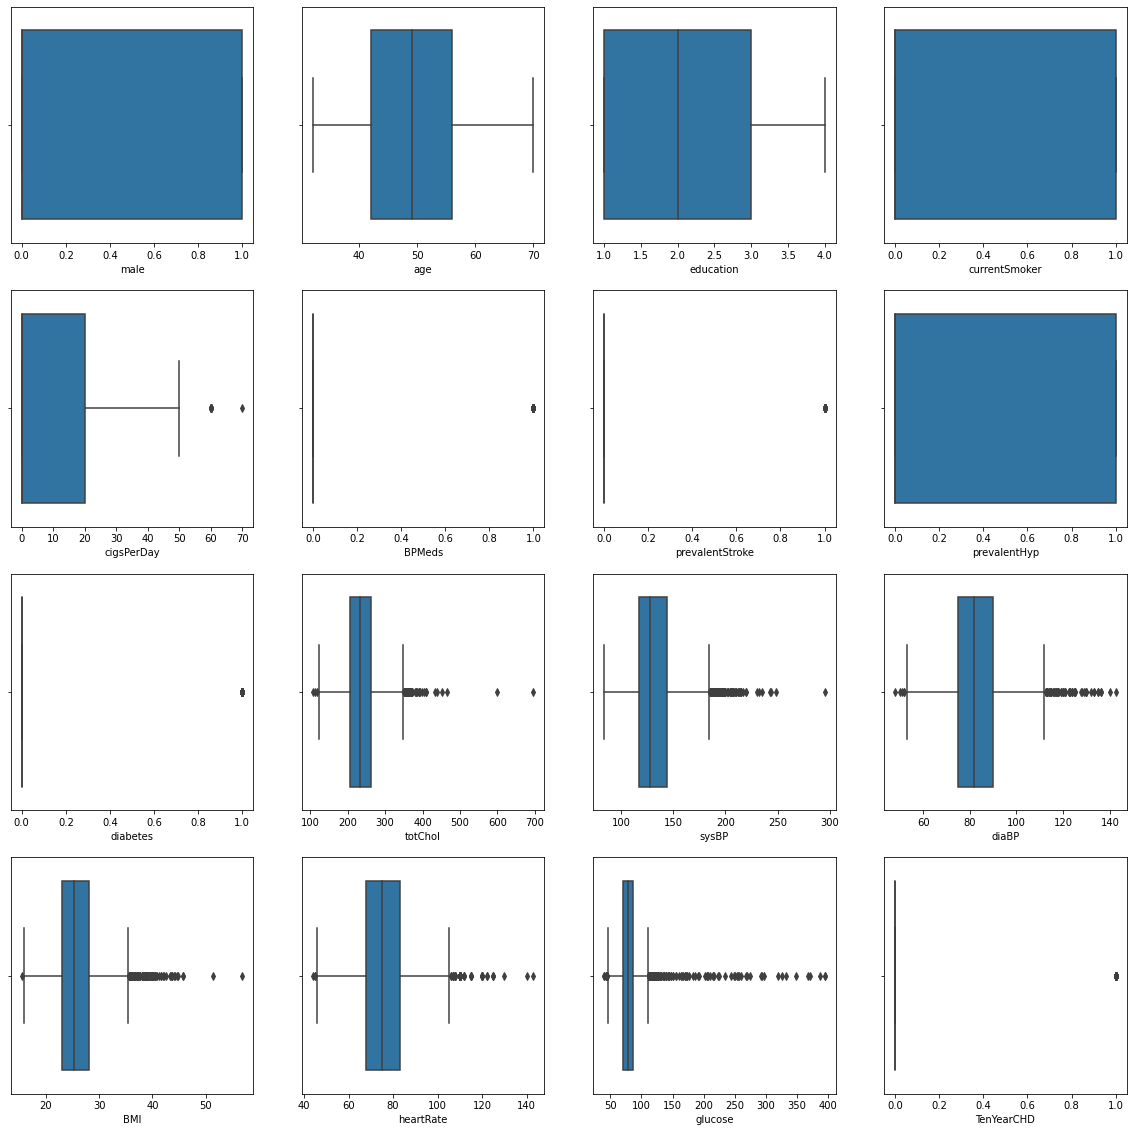

In [14]:
l=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.boxplot(data[l[i-1]])

# we can see that diabetes,BPMeds and prevalent stroke column have 2 class 0 and 1 and is highly imbalance that one type of class is looking like outlier same with target column

<Figure size 1440x1440 with 0 Axes>

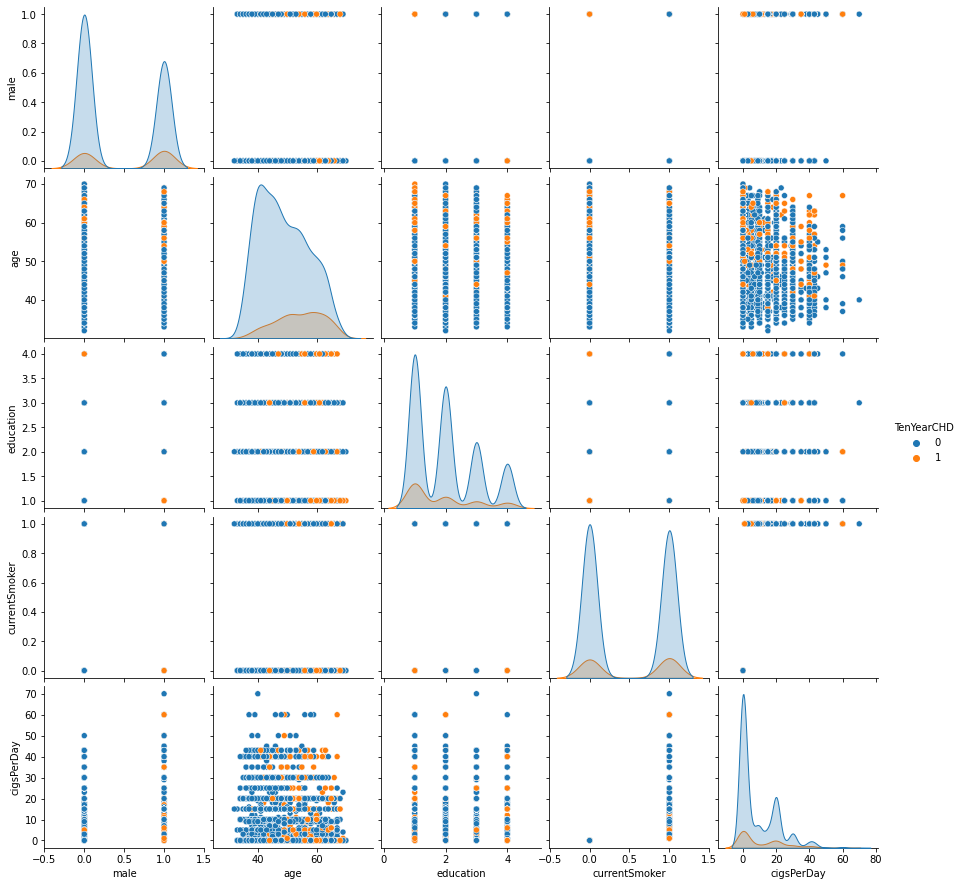

In [15]:
data1=data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'TenYearCHD']]
data2=data[['BPMeds','male','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol','TenYearCHD']]
data3=data[[  'sysBP','diaBP', 'male','BMI', 'heartRate', 'glucose','TenYearCHD']]
plt.figure(figsize=(20,20))
sns.pairplot(data1,hue='TenYearCHD')

### chances of having CHD after 10 year in female is less as compared to male and also in female age below 60 are safe i.e the chance of having CHD is after 60 and in male it is after 50 
### so male have capacity to have CHD in young age as compared to females

<Figure size 1440x1440 with 0 Axes>

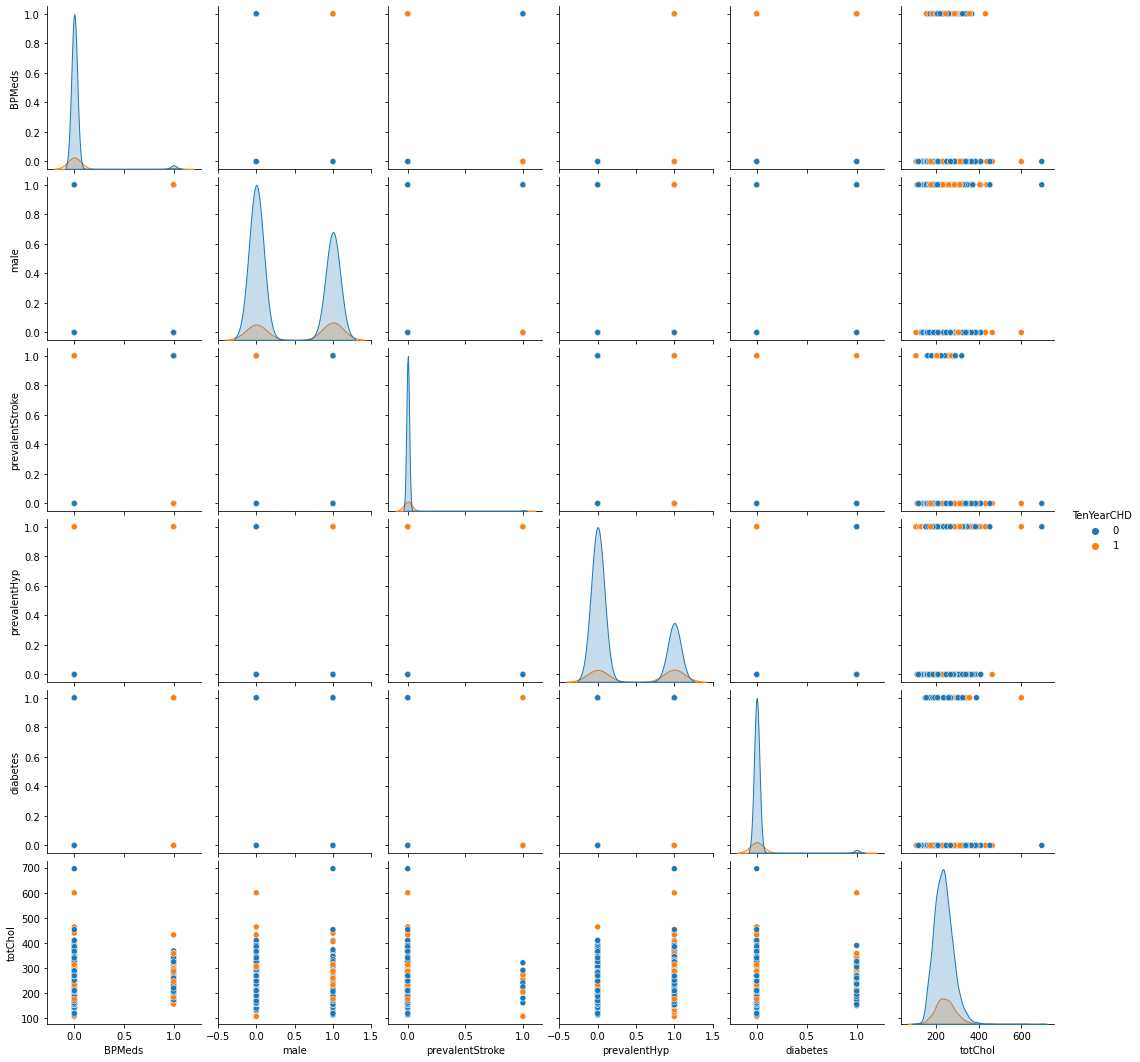

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(data2,hue='TenYearCHD')

<Figure size 1440x1440 with 0 Axes>

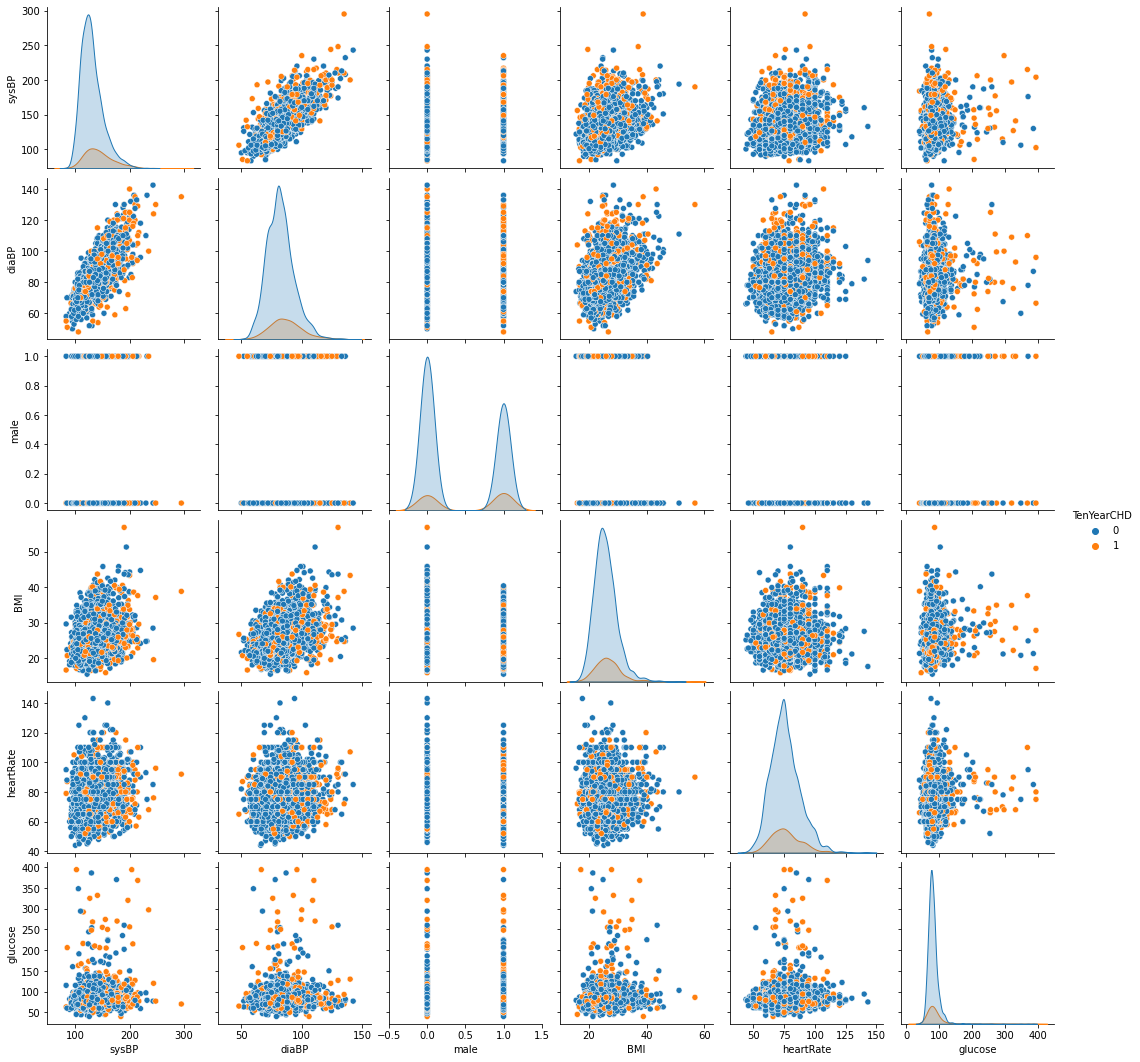

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(data3,hue='TenYearCHD')

In [18]:
data.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002282,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


In [19]:
data['TenYearCHD'].value_counts()/data.shape[0]*100

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

<AxesSubplot:>

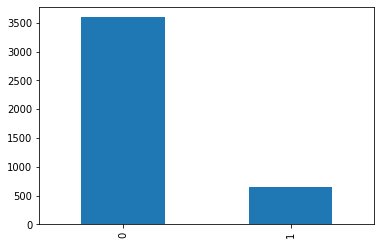

In [20]:
data['TenYearCHD'].value_counts().plot(kind='bar')

## Data is Highly imbalanced

In [21]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [22]:
data.isnull().sum()[data.isnull().sum()>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

### there are 7 columns having  null values

## treating missing values
### there are 2 ways to treat null values one is univariate imputation in which single columns are used another one is multivariate imputation in which more than 1 column participate in finding missing data

## Univariate imputation consitst mean,median,mode,constant,missing indicatorand and random value imputation also we can drop that row
### if there is a column in which percentage of missing data is very high then we can drop that column and if missing data is below 5% then we can use central values to fill that for normally distributed data use either mean ,median or mode but for skewed data use median

In [23]:
data['education_mean']=data['education'].fillna(data['education'].mean())
data['education_median']=data['education'].fillna(data['education'].median())
data['education_mode']=data['education'].fillna( 1)

In [24]:
print(data['education_mode'].var())
print(data['education_mean'].var())
print(data['education_median'].var())
print(data['education'].var())

1.0373617081280069
1.0142007653133043
1.0142114741669352
1.0399730500078583


# after filling missing values we should always check for variance, variance should not change much

<AxesSubplot:ylabel='Density'>

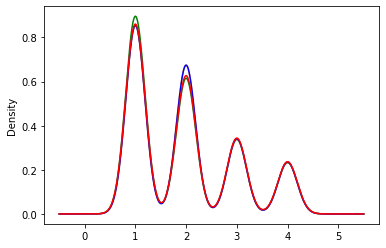

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['education_mode'].plot.density(ax=ax,color='green')
data['education_mean'].plot.density(ax=ax,color='orange')
data['education_median'].plot.density(ax=ax,color='blue')
data['education'].plot.density(ax=ax,color='red')

### Due to filling missing values sometimes distribution of data may get change so we should also check it if distribution is changing so we can select our technique accordingly

<AxesSubplot:>

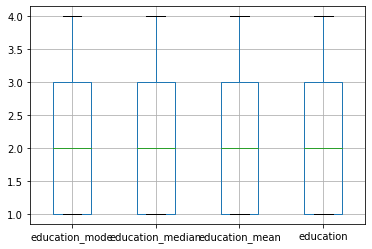

In [26]:
data[['education_mode','education_median','education_mean','education']].boxplot()

### sometimes there is a chance of increasing outliers after filling missing values that is also a red flag that we should go with other techniques so also see that

In [27]:
data['cigsPerDay_mean']=data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['cigsPerDay_median']=data['cigsPerDay'].fillna(data['cigsPerDay'].median())
data['cigsPerDay_mode']=data['cigsPerDay'].fillna( 0)

In [28]:
print(data['cigsPerDay_mode'].var())
print(data['cigsPerDay_mean'].var())
print(data['cigsPerDay_median'].var())
print(data['cigsPerDay'].var())

141.66709641116378
141.11611041962354
141.66709641116378
142.08863114257247


<AxesSubplot:ylabel='Density'>

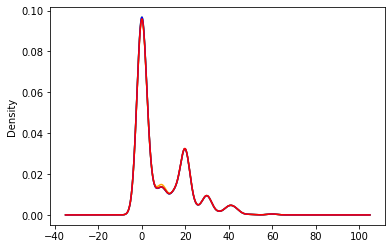

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['cigsPerDay_mode'].plot.density(ax=ax,color='green')
data['cigsPerDay_mean'].plot.density(ax=ax,color='orange')
data['cigsPerDay_median'].plot.density(ax=ax,color='blue')
data['cigsPerDay'].plot.density(ax=ax,color='red')

<AxesSubplot:>

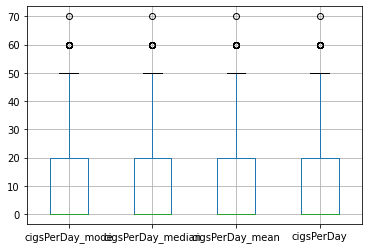

In [30]:
data[['cigsPerDay_mode','cigsPerDay_median','cigsPerDay_mean','cigsPerDay']].boxplot()

In [31]:
data['BPMeds_mean']=data['BPMeds'].fillna(data['BPMeds'].mean())
data['BPMeds_median']=data['BPMeds'].fillna(data['BPMeds'].median())
data['BPMeds_mode']=data['BPMeds'].fillna( 0)

In [32]:
print(data['BPMeds_mode'].var())
print(data['BPMeds_mean'].var())
print(data['BPMeds_median'].var())
print(data['BPMeds'].var())

0.028409694011151232
0.028398849640294065
0.028409694011151232
0.028758586502372358


<AxesSubplot:ylabel='Density'>

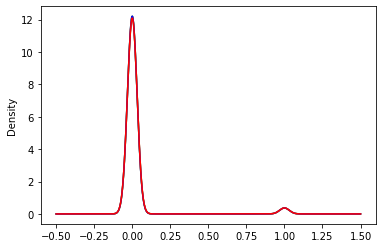

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['BPMeds_mode'].plot.density(ax=ax,color='green')
data['BPMeds_mean'].plot.density(ax=ax,color='orange')
data['BPMeds_median'].plot.density(ax=ax,color='blue')
data['BPMeds'].plot.density(ax=ax,color='red')

<AxesSubplot:>

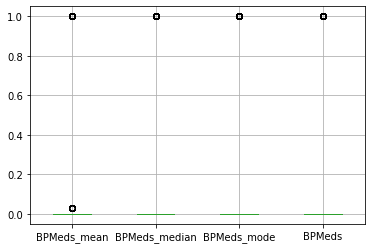

In [34]:
data[['BPMeds_mean','BPMeds_median','BPMeds_mode','BPMeds']].boxplot()

In [35]:
data['totChol_mean']=data['totChol'].fillna(data['totChol'].mean())
data['totChol_median']=data['totChol'].fillna(data['totChol'].median())
data['totChol_mode']=data['totChol'].fillna( 240)

In [36]:
print(data['totChol_mode'].var())
print(data['totChol_mean'].var())
print(data['totChol_median'].var())
print(data['totChol'].var())

1964.9597423894293
1964.8344037461407
1964.9207813634866
1988.2979146578452


<AxesSubplot:ylabel='Density'>

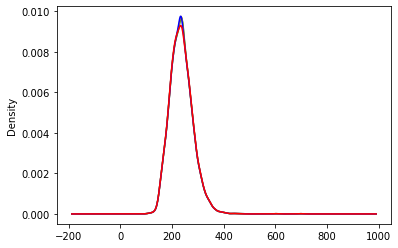

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['totChol_mode'].plot.density(ax=ax,color='green')
data['totChol_mean'].plot.density(ax=ax,color='orange')
data['totChol_median'].plot.density(ax=ax,color='blue')
data['totChol'].plot.density(ax=ax,color='red')

<AxesSubplot:>

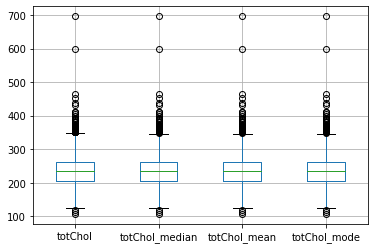

In [38]:
data[['totChol','totChol_median','totChol_mean','totChol_mode']].boxplot()

### in missing indicator class there will be formation of new column in which true and false values will be stored true for nan and false for not nan in our simple imputer class there is also add indicator keeping that true will do same work as missing indicator is doing and we will not need to use missing indicator class

In [39]:
from sklearn.impute import MissingIndicator
mi=MissingIndicator()
x=mi.fit_transform(data[['totChol']])
data['totChol_mi']=x

In [40]:
data['totChol_mi']

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: totChol_mi, Length: 4238, dtype: bool

In [41]:
data['BMI_mean']=data['BMI'].fillna(data['BMI'].mean())
data['BMI_median']=data['BMI'].fillna(data['BMI'].median())
data['BMI_mode']=data['BMI'].fillna(22)

In [42]:
print(data['BMI_mode'].var())
print(data['BMI_mean'].var())
print(data['BMI_median'].var())
print(data['BMI'].var())

16.637185873013788
16.572654683917225
16.573376143828558
16.647306281592527


<AxesSubplot:ylabel='Density'>

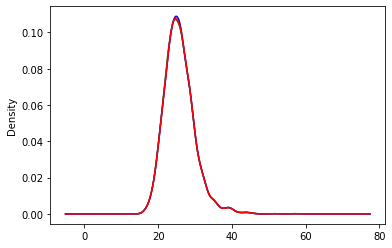

In [43]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['BMI_mode'].plot.density(ax=ax,color='green')
data['BMI_mean'].plot.density(ax=ax,color='orange')
data['BMI_median'].plot.density(ax=ax,color='blue')
data['BMI'].plot.density(ax=ax,color='red')

<AxesSubplot:>

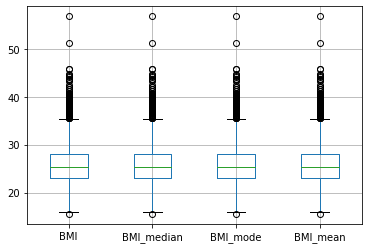

In [44]:
data[['BMI','BMI_median','BMI_mode','BMI_mean']].boxplot()

In [45]:
data['heartRate_mean']=data['heartRate'].fillna(data['heartRate'].mean())
data['heartRate_median']=data['heartRate'].fillna(data['heartRate'].median())
data['heartRate_mode']=data['heartRate'].fillna(75)

In [46]:
print(data['heartRate_mode'].var())
print(data['heartRate_mean'].var())
print(data['heartRate_median'].var())
print(data['heartRate'].var())

144.6050649556487
144.60488267462276
144.6050649556487
144.63901980462148


<AxesSubplot:ylabel='Density'>

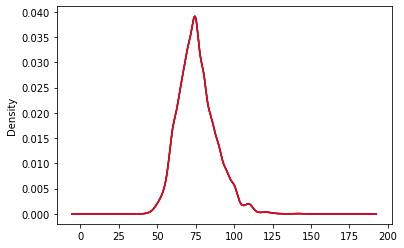

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['heartRate_mode'].plot.density(ax=ax,color='green')
data['heartRate_mean'].plot.density(ax=ax,color='orange')
data['heartRate_median'].plot.density(ax=ax,color='blue')
data['heartRate'].plot.density(ax=ax,color='red')

<AxesSubplot:>

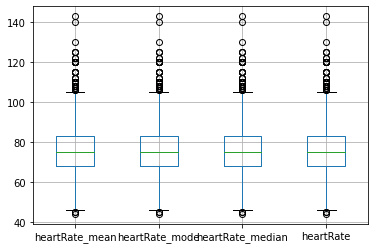

In [48]:
data[['heartRate_mean','heartRate_mode','heartRate_median','heartRate']].boxplot()

In [49]:
data['glucose_mean']=data['glucose'].fillna(data['glucose'].mean())
data['glucose_median']=data['glucose'].fillna(data['glucose'].median())
data['glucose_mode']=data['glucose'].fillna(75)

In [50]:
print(data['glucose_mode'].var())
print(data['glucose_mean'].var())
print(data['glucose_median'].var())
print(data['glucose'].var())

525.5481409809959
521.5104423921607
522.8194537370117
574.0815132282631


<AxesSubplot:ylabel='Density'>

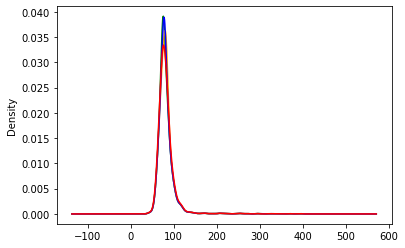

In [51]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['glucose_mode'].plot.density(ax=ax,color='green')
data['glucose_mean'].plot.density(ax=ax,color='orange')
data['glucose_median'].plot.density(ax=ax,color='blue')
data['glucose'].plot.density(ax=ax,color='red')

<AxesSubplot:>

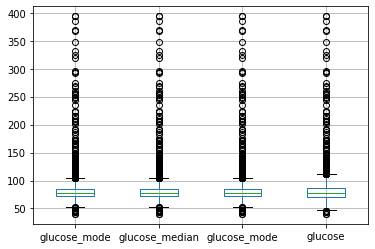

In [52]:
data[['glucose_mode','glucose_median','glucose_mode','glucose']].boxplot()

### in glucose column we can see after filling missing values outlier get increased we can also go with random value imputation it's advantage over central value imputation is that distribution does not change much but the covariance get distorted with other variables so take care of that 
### also there is no class in sklearn for random value imputation 

In [53]:
data['glucose_ran']=data['glucose']
data['glucose_ran'][data['glucose_ran'].isnull()]=data['glucose_ran'].dropna().sample(n=data['glucose_ran'].isnull().sum(),random_state=1).values

<AxesSubplot:>

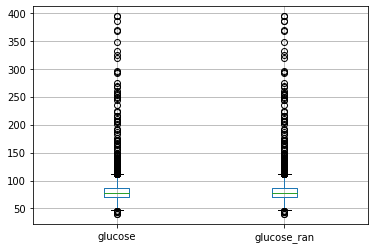

In [54]:
data[['glucose','glucose_ran']].boxplot()

In [55]:
print(data['glucose'].std())
print(data['glucose_ran'].std())

23.959998189237478
24.36249221033785


In [56]:
data[['glucose','glucose_ran','education']].cov()

,glucose,glucose_ran,education
glucose,574.081513,574.081513,-0.875832
glucose_ran,574.081513,593.531027,-0.841051
education,-0.875832,-0.841051,1.039973


### change in covariance with other columns is not very much

<AxesSubplot:ylabel='Density'>

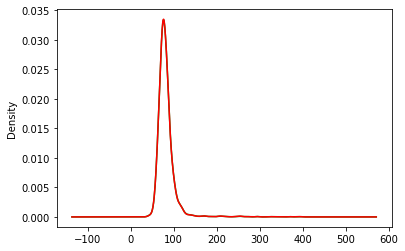

In [57]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['glucose'].plot.density(ax=ax,color='green')
data['glucose_ran'].plot.density(ax=ax,color='red')

### also check cov and correlation with other classes after filling nan values

In [58]:
data[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose',
      'education_mode','cigsPerDay_mode','BPMeds_mode','totChol_mode','BMI_mode','heartRate_mode','glucose_ran']].cov()
    

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose,education_mode,cigsPerDay_mode,BPMeds_mode,totChol_mode,BMI_mode,heartRate_mode,glucose_ran
education,1.039973,0.098328,-0.001870,-1.042491,-0.572694,-0.666095,-0.875832,1.039973,0.094258,-0.001804,-1.036569,-0.569631,-0.665715,-0.841051
cigsPerDay,0.098328,142.088631,-0.093550,-13.965639,-4.522219,10.768609,-16.859472,0.121576,142.088631,-0.092059,-13.697776,-4.445734,10.764199,-11.085060
BPMeds,-0.001870,-0.093550,0.028759,0.603961,0.069477,0.031148,0.209963,-0.001797,-0.091051,0.028759,0.598118,0.068764,0.031147,0.181503
totChol,-1.042491,-13.965639,0.603961,1988.297915,21.052042,48.922208,49.814344,-1.075154,-14.316924,0.595101,1988.297915,21.165503,48.914123,51.804903
BMI,-0.572694,-4.522219,0.069477,21.052042,16.647306,3.322245,8.433842,-0.580960,-4.494018,0.068683,20.827459,16.647306,3.320732,7.477953
heartRate,-0.666095,10.768609,0.031148,48.922208,3.322245,144.639020,27.014158,-0.607678,10.574807,0.030693,48.436772,3.303485,144.639020,26.757905
glucose,-0.875832,-16.859472,0.209963,49.814344,8.433842,27.014158,574.081513,-0.878181,-16.950179,0.207012,49.744392,8.283908,27.005418,574.081513
education_mode,1.039973,0.121576,-0.001797,-1.075154,-0.580960,-0.607678,-0.878181,1.037362,0.120077,-0.001742,-1.068452,-0.577332,-0.607337,-0.836538
cigsPerDay_mode,0.094258,142.088631,-0.091051,-14.316924,-4.494018,10.574807,-16.950179,0.120077,141.667096,-0.089626,-14.045894,-4.419228,10.570432,-11.083370
BPMeds_mode,-0.001804,-0.092059,0.028759,0.595101,0.068683,0.030693,0.207012,-0.001742,-0.089626,0.028410,0.589268,0.067976,0.030691,0.179282


# covarience of is also nearly same we can also check correlation

<AxesSubplot:>

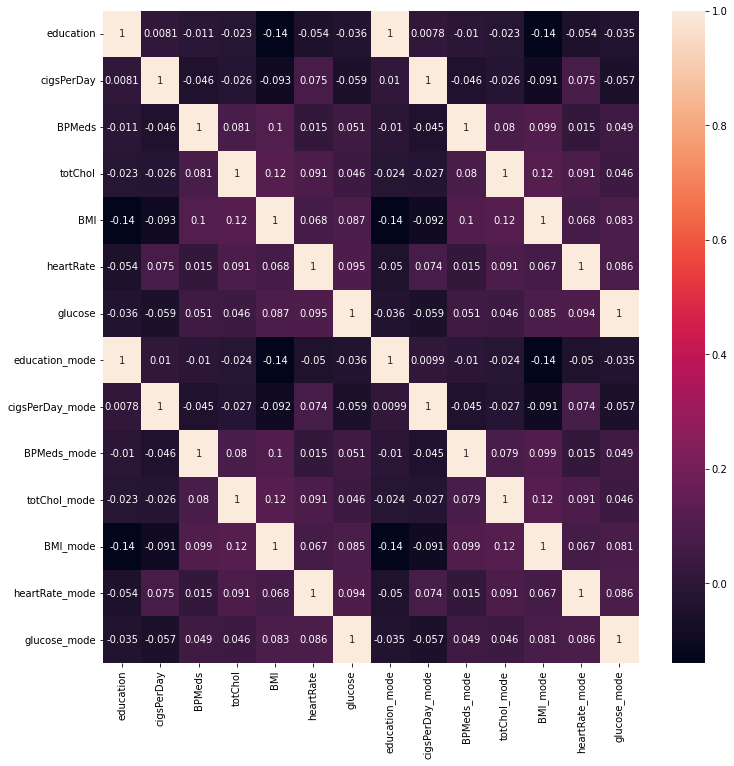

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(data[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose',
      'education_mode','cigsPerDay_mode','BPMeds_mode','totChol_mode','BMI_mode','heartRate_mode','glucose_mode']].corr(),annot=True)
    

## correlation is also same before and after 

In [60]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'education_mean',
       'education_median', 'education_mode', 'cigsPerDay_mean',
       'cigsPerDay_median', 'cigsPerDay_mode', 'BPMeds_mean', 'BPMeds_median',
       'BPMeds_mode', 'totChol_mean', 'totChol_median', 'totChol_mode',
       'totChol_mi', 'BMI_mean', 'BMI_median', 'BMI_mode', 'heartRate_mean',
       'heartRate_median', 'heartRate_mode', 'glucose_mean', 'glucose_median',
       'glucose_mode', 'glucose_ran'],
      dtype='object')

### create new data frame with all the selected columns in which distribution,variance is not changing much.....one thing also for filling central values we have simple imputer class so we should use that in production here i have not used that simple imputer class

In [61]:
new_data=data[['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode', 
       'prevalentHyp', 'totChol_mode', 'sysBP','BPMeds_mode','prevalentStroke','diabetes',
       'diaBP', 'BMI_mode', 'heartRate_mode', 'glucose_ran', 'TenYearCHD']]

In [62]:
new_data.columns

Index(['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode',
       'prevalentHyp', 'totChol_mode', 'sysBP', 'BPMeds_mode',
       'prevalentStroke', 'diabetes', 'diaBP', 'BMI_mode', 'heartRate_mode',
       'glucose_ran', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:>

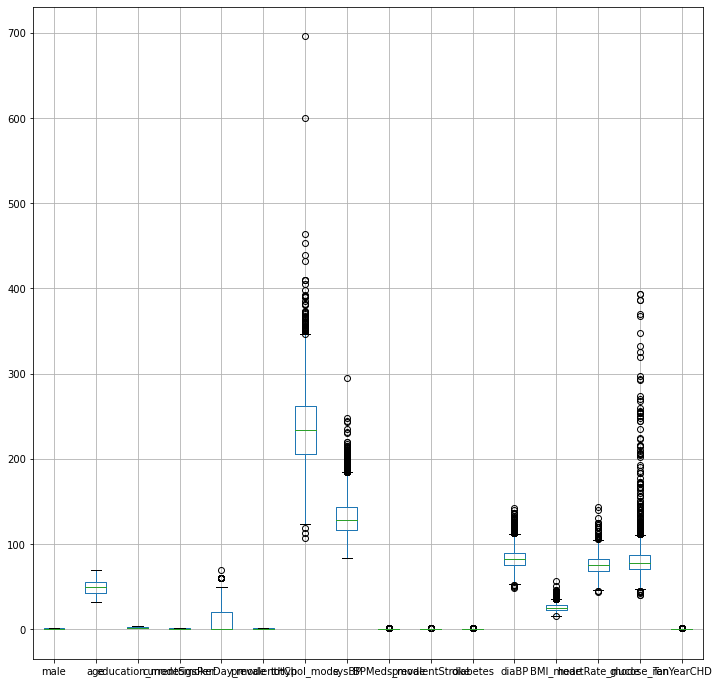

In [63]:
plt.figure(figsize=(12,12))
new_data.boxplot()

In [64]:
new_data.columns

Index(['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode',
       'prevalentHyp', 'totChol_mode', 'sysBP', 'BPMeds_mode',
       'prevalentStroke', 'diabetes', 'diaBP', 'BMI_mode', 'heartRate_mode',
       'glucose_ran', 'TenYearCHD'],
      dtype='object')

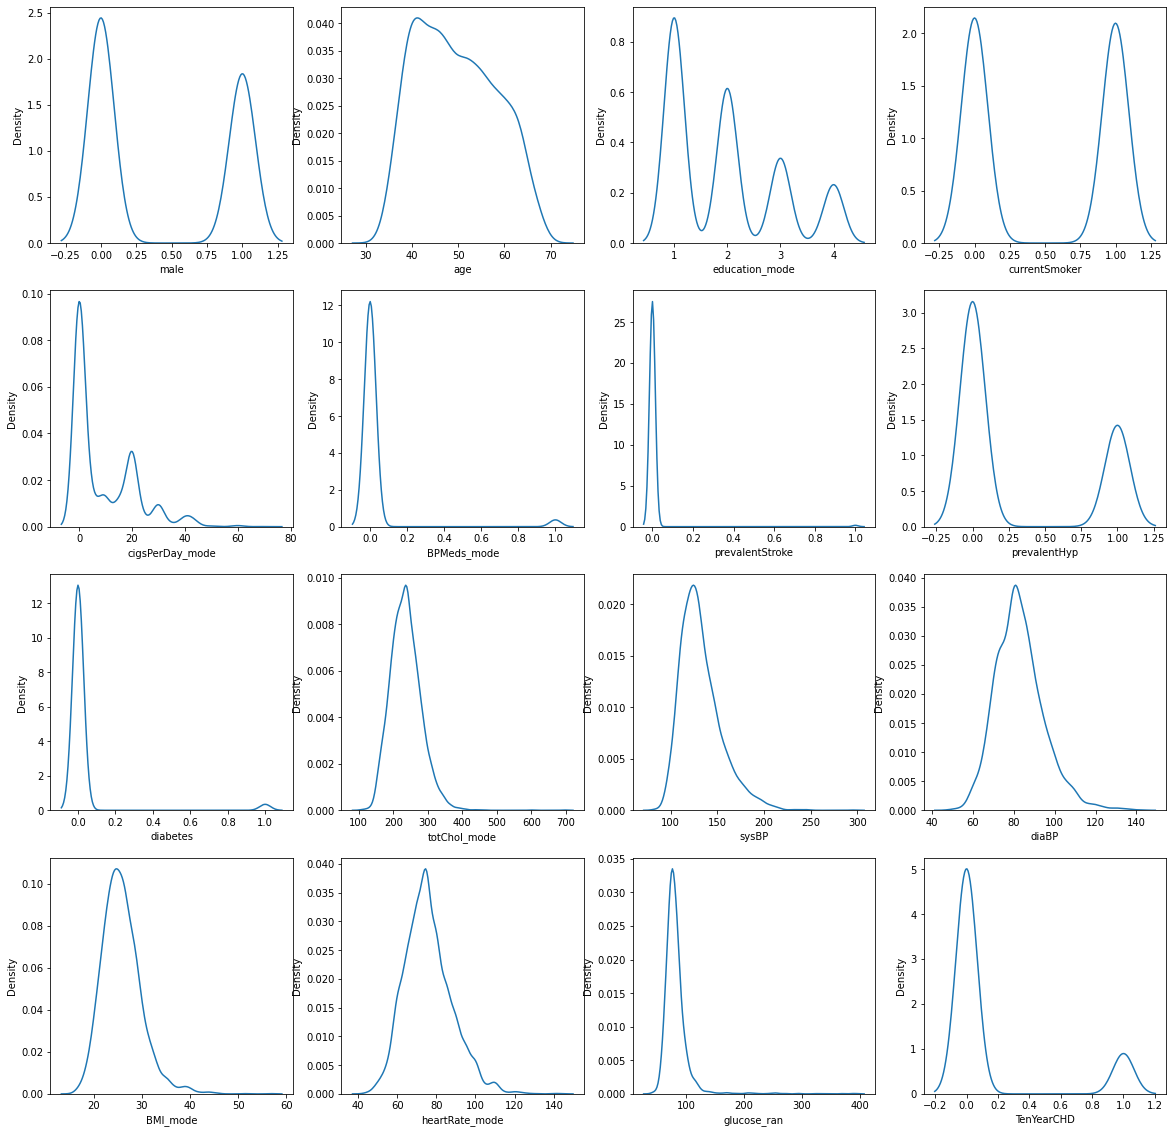

In [65]:
l=['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode', 'BPMeds_mode',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol_mode', 'sysBP',
       'diaBP', 'BMI_mode', 'heartRate_mode', 'glucose_ran', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(new_data[l[i-1]],hist=False)

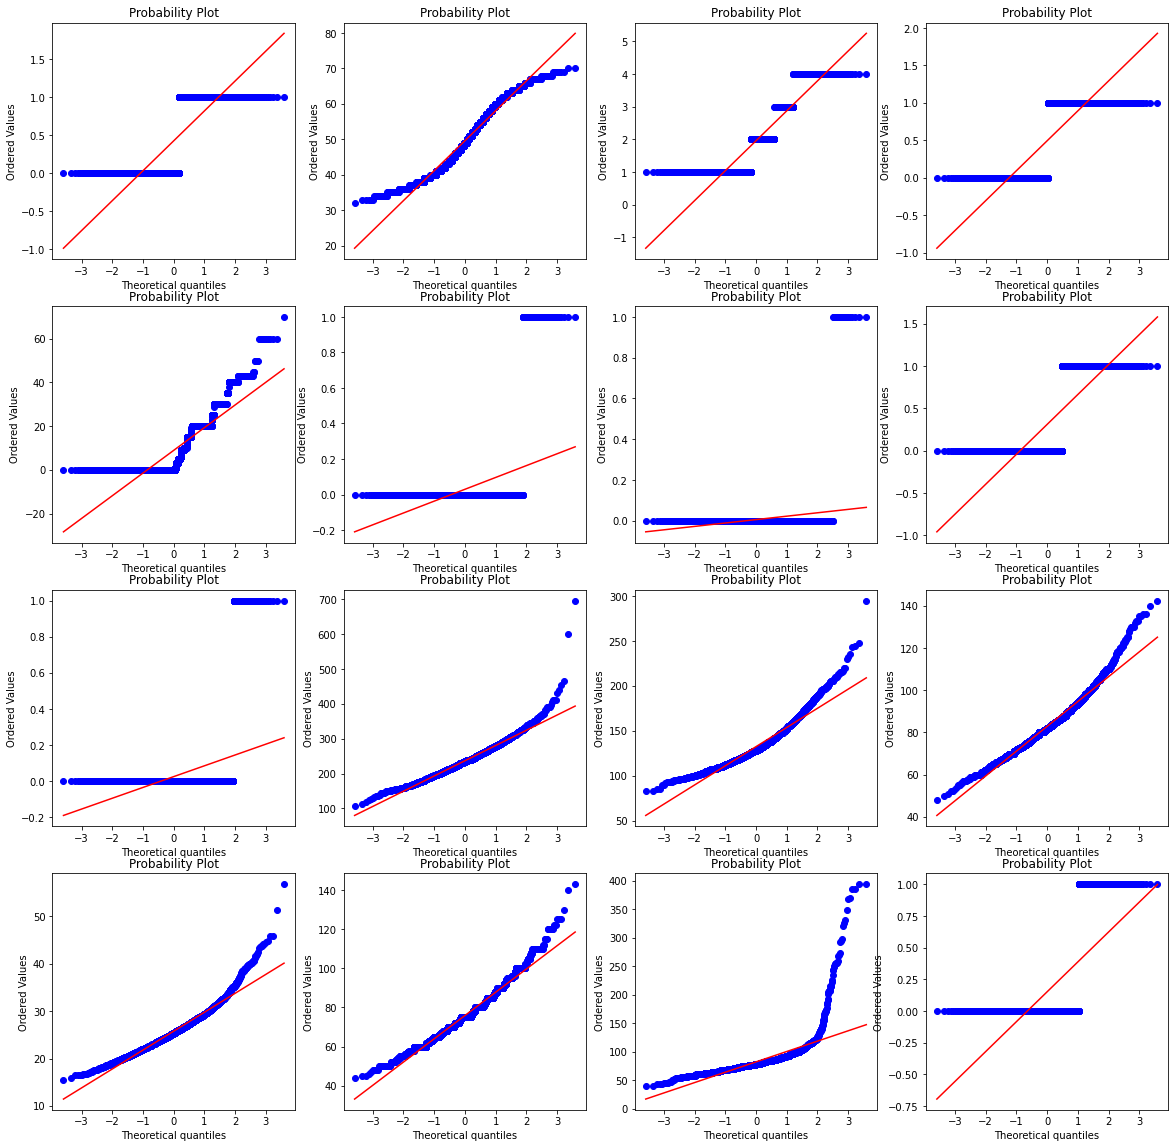

In [66]:
l=['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode', 'BPMeds_mode',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol_mode', 'sysBP',
       'diaBP', 'BMI_mode', 'heartRate_mode', 'glucose_ran', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    stats.probplot(data[l[i-1]],dist='norm',plot=plt)

## discretization is a technique of converting continues variable into discrete variable it can improve our accuracy there are 3 ways to do that quantile,uniform and kbins

In [67]:
kb=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile',)
new_data['age']=kb.fit_transform(new_data[['age']])

### transformation is applied to  normalize the columns here standardization is also done internally so no need to standardization

In [68]:
pt=PowerTransformer()
new_data=new_data.drop(columns='TenYearCHD')
x=pt.fit_transform(new_data)
new_data=pd.DataFrame(x,columns=new_data.columns)

In [69]:
new_data

,male,age,education_mode,currentSmoker,cigsPerDay_mode,prevalentHyp,totChol_mode,sysBP,BPMeds_mode,prevalentStroke,diabetes,diaBP,BMI_mode,heartRate_mode,glucose_ran
0,1.153192,-1.338550,1.570820,-0.988271,-0.936206,-0.671101,-0.960948,-1.469073,-0.173612,-0.077033,-0.162477,-1.141558,0.413773,0.434304,-0.067236
1,-0.867158,-0.006218,0.355050,-0.988271,-0.936206,-0.671101,0.387989,-0.426454,-0.173612,-0.077033,-0.162477,-0.066342,0.809803,1.498199,-0.145041
2,1.153192,-0.006218,-1.066465,1.011868,1.156057,-0.671101,0.278359,-0.060993,-0.173612,-0.077033,-0.162477,-0.155512,0.008413,0.022892,-0.669018
3,-0.867158,1.169598,1.103963,1.011868,1.326404,1.490089,-0.183860,0.928374,-0.173612,-0.077033,-0.162477,1.040674,0.777573,-0.912982,1.337816
4,-0.867158,-0.006218,1.103963,1.011868,1.216336,-0.671101,1.098757,0.068458,-0.173612,-0.077033,-0.162477,0.192255,-0.621509,0.814824,0.476597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.153192,-0.006218,-1.066465,1.011868,-0.311830,1.490089,1.606820,1.792240,-0.173612,-0.077033,-0.162477,0.823348,0.169881,-0.811562,0.536038
4234,1.153192,-0.006218,1.103963,1.011868,1.466068,-0.671101,-0.636599,-0.114420,-0.173612,-0.077033,-0.162477,-0.155512,-1.783914,-0.912982,-0.868748
4235,-0.867158,-0.006218,0.355050,1.011868,1.156057,-0.671101,0.344404,0.118655,-0.173612,-0.077033,-0.162477,-0.929284,-0.967559,0.740992,0.536038
4236,-0.867158,-0.006218,-1.066465,1.011868,1.026915,-0.671101,-0.558462,-0.114420,-0.173612,-0.077033,-0.162477,0.438340,-2.002588,0.887579,-0.145041


In [70]:
new_data.columns

Index(['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode',
       'prevalentHyp', 'totChol_mode', 'sysBP', 'BPMeds_mode',
       'prevalentStroke', 'diabetes', 'diaBP', 'BMI_mode', 'heartRate_mode',
       'glucose_ran'],
      dtype='object')

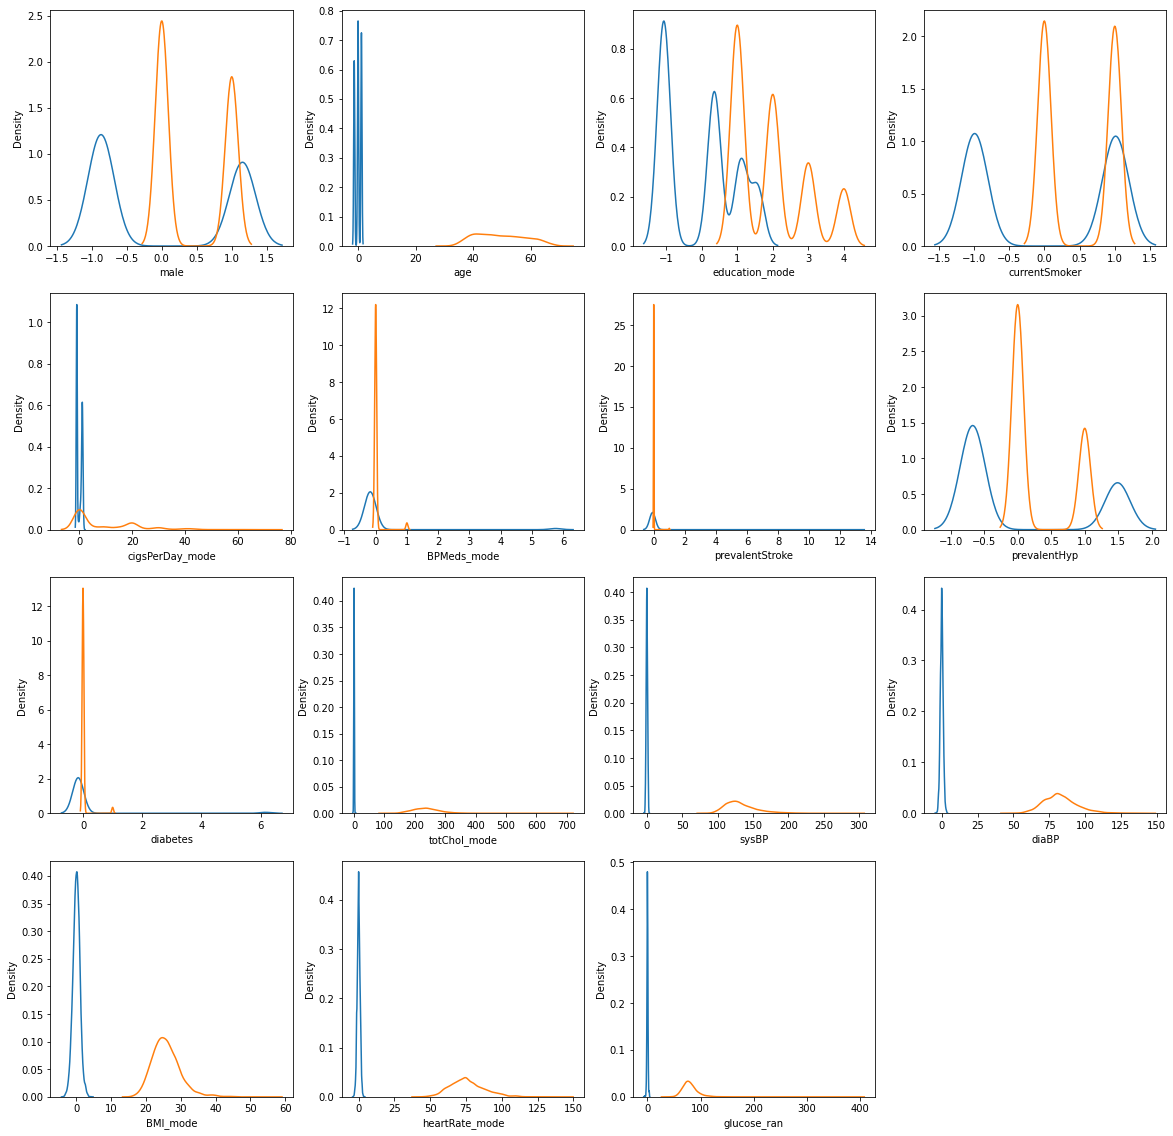

In [71]:
l=['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode', 'BPMeds_mode',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol_mode', 'sysBP',
       'diaBP', 'BMI_mode', 'heartRate_mode', 'glucose_ran']
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    sns.distplot(new_data[l[i-1]],hist=False)
    sns.distplot(data[l[i-1]],hist=False)

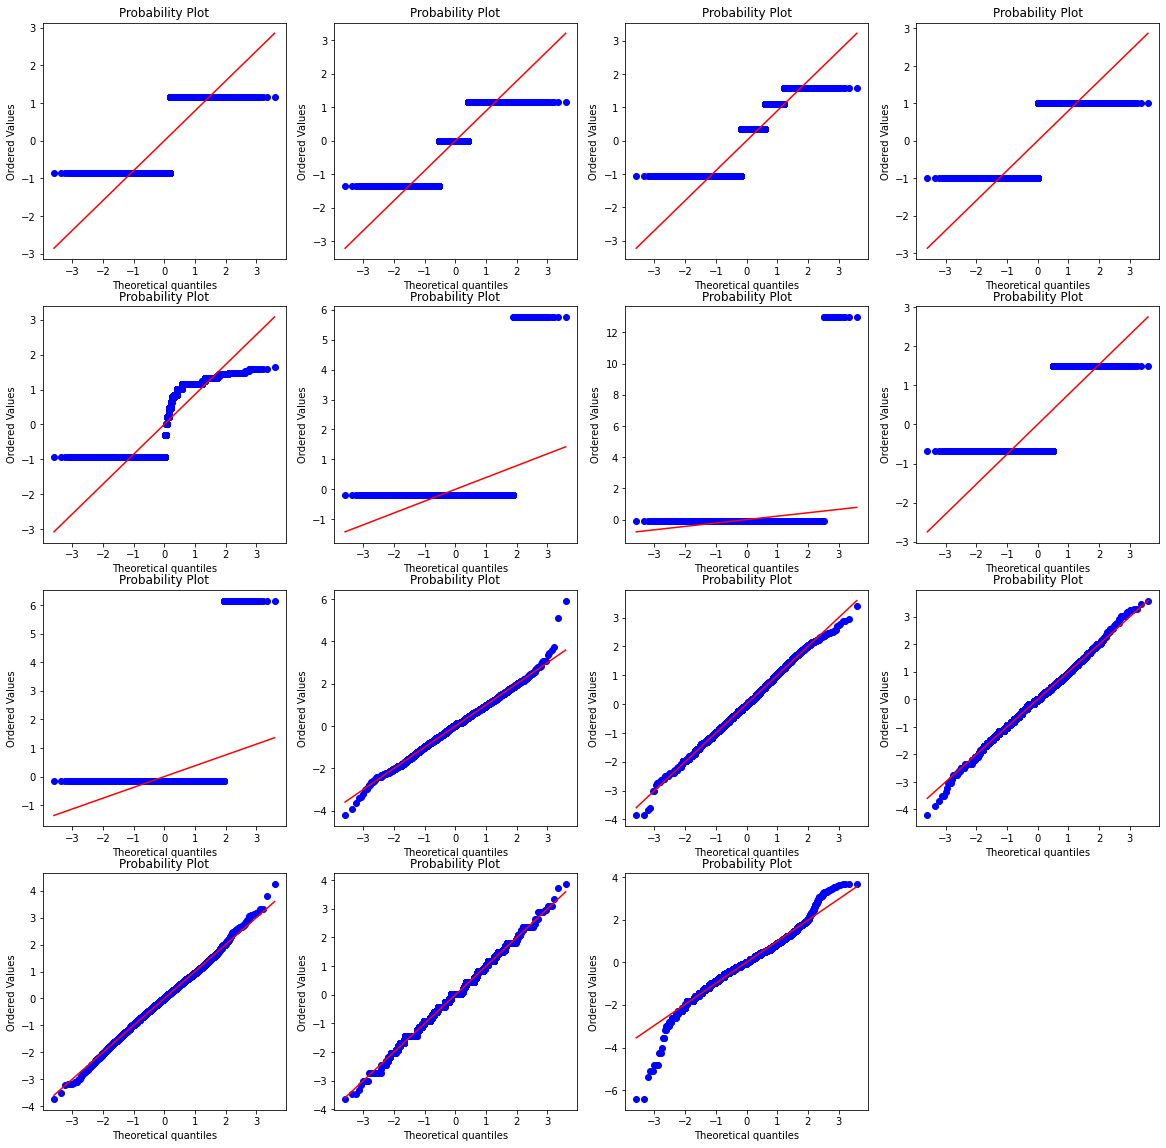

In [72]:
l=['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode', 'BPMeds_mode',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol_mode', 'sysBP',
       'diaBP', 'BMI_mode', 'heartRate_mode', 'glucose_ran', ]
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    stats.probplot(new_data[l[i-1]],dist='norm',plot=plt)

### we can see the effect of power transformation on last 6 columns they align on the line

<AxesSubplot:>

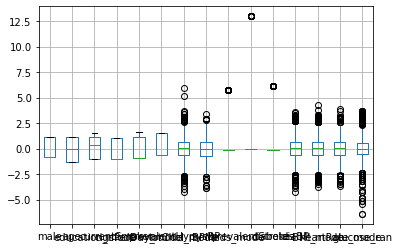

In [73]:
new_data.boxplot()

### there is outliers in 6 columns we can use interqartile methode or z-score method

In [74]:
new_data.columns

Index(['male', 'age', 'education_mode', 'currentSmoker', 'cigsPerDay_mode',
       'prevalentHyp', 'totChol_mode', 'sysBP', 'BPMeds_mode',
       'prevalentStroke', 'diabetes', 'diaBP', 'BMI_mode', 'heartRate_mode',
       'glucose_ran'],
      dtype='object')

In [75]:
l=['totChol_mode', 'sysBP','diaBP', 'BMI_mode', 'heartRate_mode', 'glucose_ran']
for x in l:
    q1=new_data[x].quantile(.25)
    q3=new_data[x].quantile(.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    new_data[x]=np.where(new_data[x]>upper_limit,upper_limit,
                np.where(new_data[x]<lower_limit,lower_limit,data[x]))

### pca is applied to convert high dimension data in low dimension without loosing the covariance it reduces computational time and increases the visualization
### It helps to find the most significant features in a dataset and makes the data easy for plotting 

In [76]:
pca=PCA()
new_data=pca.fit_transform(new_data)

### the graph will tell us how many features are important

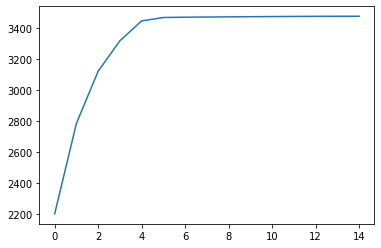

In [77]:
plt.plot(np.cumsum(pca.explained_variance_))

### we can see that after 4 or 5 features the graph is constant so we can select 5 features 

In [78]:
pca=PCA(5)
new_data=pca.fit_transform(new_data)

### train test split

In [79]:
x=new_data
y=data['TenYearCHD']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2,stratify=y)

### grid search cv or random search cv is used to find out best parameters and is highly usefull in hyperparameter tuning as it run with all the parameters in combination and then select the best parameters

In [80]:
param_grid={'random_state':[2,0,10,42,52,56]}
ee=EasyEnsembleClassifier()
gsv=GridSearchCV(ee,param_grid=param_grid)
gsv=GridSearchCV(ee,param_grid=param_grid,cv=5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=EasyEnsembleClassifier(),
             param_grid={'random_state': [2, 0, 10, 42, 52, 56]})

In [81]:
gsv.best_params_

{'random_state': 52}

### training and evaluation

### easy ensemble is a technique for downsampling as we have seen our data set is highly imbalance so upsampling or downsampling i have done

0.6615566037735849
0.5348837209302325
[[492 227]
 [ 60  69]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       719
           1       0.23      0.53      0.32       129

    accuracy                           0.66       848
   macro avg       0.56      0.61      0.55       848
weighted avg       0.79      0.66      0.71       848

0.6095837241646991


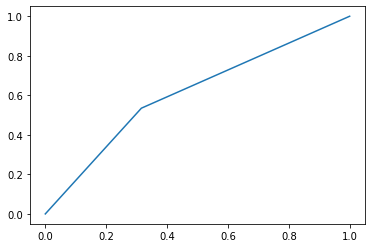

In [82]:
ee=EasyEnsembleClassifier(random_state= 52)
ee.fit(x_train,y_train)
print(accuracy_score(y_test,ee.predict(x_test)))
print(recall_score(y_test,ee.predict(x_test)))
print(confusion_matrix(y_test,ee.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ee.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,ee.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='EasyEnsembleClassifier')

# One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [83]:
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

0.660377358490566
0.5271317829457365
[[492 227]
 [ 61  68]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       719
           1       0.23      0.53      0.32       129

    accuracy                           0.66       848
   macro avg       0.56      0.61      0.55       848
weighted avg       0.79      0.66      0.70       848

0.605707755172451


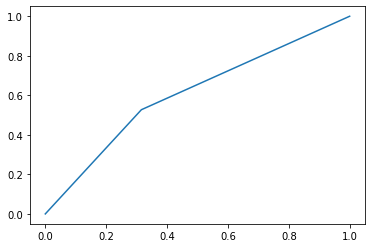

In [84]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=1.11,algorithm='SAMME.R',random_state=0)
ada.fit(x_train,y_train)
print(accuracy_score(y_test,ada.predict(x_test)))
print(recall_score(y_test,ada.predict(x_test)))
print(confusion_matrix(y_test,ada.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ada.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,ada.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='AdaBoostClassifier')

0.7712264150943396
0.3178294573643411
[[613 106]
 [ 88  41]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       719
           1       0.28      0.32      0.30       129

    accuracy                           0.77       848
   macro avg       0.58      0.59      0.58       848
weighted avg       0.78      0.77      0.78       848

0.5852012377225044


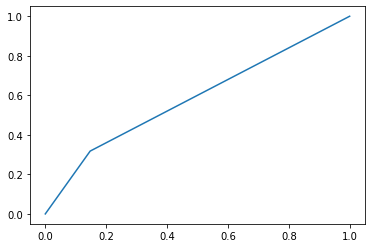

In [85]:
rf=RandomForestClassifier(random_state=56,n_estimators=20)
rf.fit(x_train,y_train)
print(accuracy_score(y_test,rf.predict(x_test)))
print(recall_score(y_test,rf.predict(x_test)))
print(confusion_matrix(y_test,rf.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,rf.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='RandomForestClassifier')

0.6898584905660378
0.5503875968992248
[[514 205]
 [ 58  71]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       719
           1       0.26      0.55      0.35       129

    accuracy                           0.69       848
   macro avg       0.58      0.63      0.57       848
weighted avg       0.80      0.69      0.73       848

0.6326346885747863


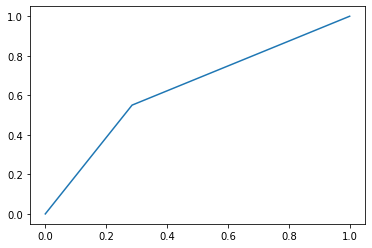

In [86]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(accuracy_score(y_test,lr.predict(x_test)))
print(recall_score(y_test,lr.predict(x_test)))
print(confusion_matrix(y_test,lr.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,lr.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='LogisticRegression')

0.6981132075471698
0.34108527131782945
[[548 171]
 [ 85  44]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       719
           1       0.20      0.34      0.26       129

    accuracy                           0.70       848
   macro avg       0.54      0.55      0.53       848
weighted avg       0.77      0.70      0.73       848

0.5516274757145475


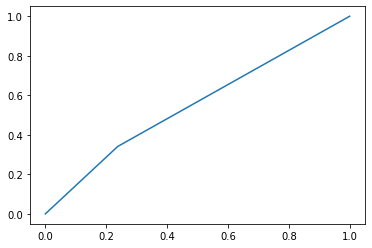

In [87]:
xgb=XGBClassifier(learning_rate=.9)
xgb.fit(x_train,y_train)
print(accuracy_score(y_test,xgb.predict(x_test)))
print(recall_score(y_test,xgb.predict(x_test)))
print(confusion_matrix(y_test,xgb.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, xgb.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,xgb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='XGBClassifier')

0.7535377358490566
0.3643410852713178
[[592 127]
 [ 82  47]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       719
           1       0.27      0.36      0.31       129

    accuracy                           0.75       848
   macro avg       0.57      0.59      0.58       848
weighted avg       0.79      0.75      0.77       848

0.5938534355424739


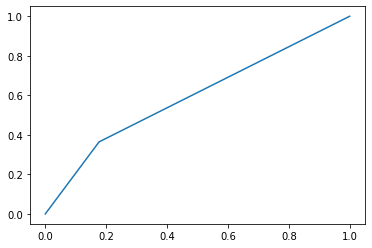

In [88]:
gnb=GaussianNB(var_smoothing=1e-03)
gnb.fit(x_train,y_train)
print(accuracy_score(y_test,gnb.predict(x_test)))
print(recall_score(y_test,gnb.predict(x_test)))
print(confusion_matrix(y_test,gnb.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gnb.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,gnb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='GaussianNB')

0.5943396226415094
0.5968992248062015
[[427 292]
 [ 52  77]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       719
           1       0.21      0.60      0.31       129

    accuracy                           0.59       848
   macro avg       0.55      0.60      0.51       848
weighted avg       0.79      0.59      0.65       848

0.5953898071179825


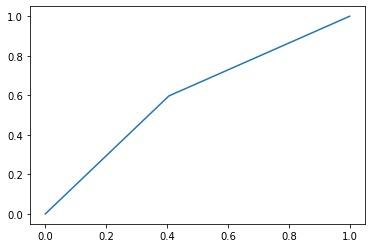

In [89]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
print(accuracy_score(y_test,bnb.predict(x_test)))
print(recall_score(y_test,bnb.predict(x_test)))
print(confusion_matrix(y_test,bnb.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, bnb.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,bnb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='BernoulliNB')

0.7158018867924528
0.4806201550387597
[[545 174]
 [ 67  62]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       719
           1       0.27      0.36      0.31       129

    accuracy                           0.75       848
   macro avg       0.57      0.59      0.58       848
weighted avg       0.79      0.75      0.77       848

0.6193086866987957


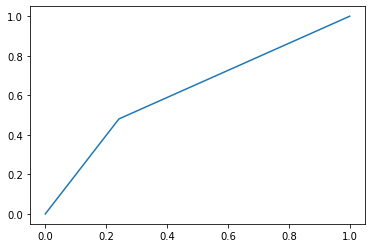

In [90]:
svc=SVC(kernel='linear',degree=2)
svc.fit(x_train,y_train)
print(accuracy_score(y_test,svc.predict(x_test)))
print(recall_score(y_test,svc.predict(x_test)))
print(confusion_matrix(y_test,svc.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svc.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,gnb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='SVC')

0.7169811320754716
0.35658914728682173
[[562 157]
 [ 83  46]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       719
           1       0.27      0.36      0.31       129

    accuracy                           0.75       848
   macro avg       0.57      0.59      0.58       848
weighted avg       0.79      0.75      0.77       848

0.5691151577880561


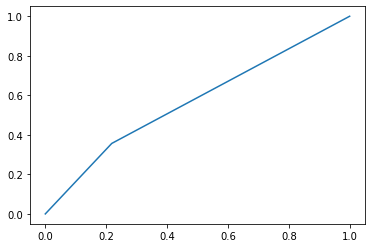

In [91]:
bag=BaggingClassifier(n_estimators=13,random_state=2)
bag.fit(x_train,y_train)
print(accuracy_score(y_test,bag.predict(x_test)))
print(recall_score(y_test,bag.predict(x_test)))
print(confusion_matrix(y_test,bag.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, bag.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,gnb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='BaggingClassifier')

0.6863207547169812
0.5038759689922481
[[517 202]
 [ 64  65]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       719
           1       0.24      0.50      0.33       129

    accuracy                           0.69       848
   macro avg       0.57      0.61      0.56       848
weighted avg       0.79      0.69      0.72       848

0.6114651054975149


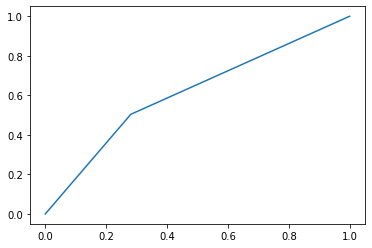

In [92]:
gb=GradientBoostingClassifier(random_state=56,n_estimators=3,min_samples_leaf=11)
gb.fit(x_train,y_train)
print(accuracy_score(y_test,gb.predict(x_test)))
print(recall_score(y_test,gb.predict(x_test)))
print(confusion_matrix(y_test,gb.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gb.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,gb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='GradientBoostingClassifier')

0.6827830188679245
0.5348837209302325
[[510 209]
 [ 60  69]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       719
           1       0.25      0.53      0.34       129

    accuracy                           0.68       848
   macro avg       0.57      0.62      0.57       848
weighted avg       0.80      0.68      0.72       848

0.6221011094220008


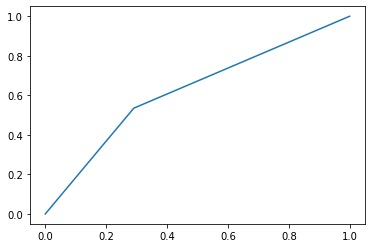

In [93]:
hgb=HistGradientBoostingClassifier(random_state=56,learning_rate=.03,max_leaf_nodes=9,)
hgb.fit(x_train,y_train)
print(accuracy_score(y_test,hgb.predict(x_test)))
print(recall_score(y_test,hgb.predict(x_test)))
print(confusion_matrix(y_test,hgb.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, hgb.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,hgb.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='HistGradientBoostingClassifier')

0.7004716981132075
0.43410852713178294
[[538 181]
 [ 73  56]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       719
           1       0.24      0.43      0.31       129

    accuracy                           0.70       848
   macro avg       0.56      0.59      0.56       848
weighted avg       0.78      0.70      0.73       848

0.591185000700801


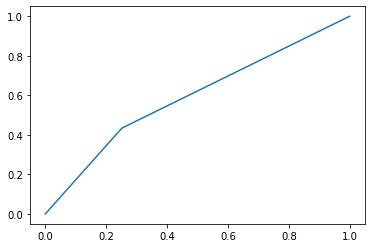

In [94]:
lgbm=LGBMClassifier(random_state=56,learning_rate=0.199,n_estimators=29)
lgbm.fit(x_train,y_train)
print(accuracy_score(y_test,lgbm.predict(x_test)))
print(recall_score(y_test,lgbm.predict(x_test)))
print(confusion_matrix(y_test,lgbm.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lgbm.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,lgbm.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='LGBMClassifier')

0.6474056603773585
0.5581395348837209
[[477 242]
 [ 57  72]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       719
           1       0.23      0.56      0.33       129

    accuracy                           0.65       848
   macro avg       0.56      0.61      0.54       848
weighted avg       0.79      0.65      0.69       848

0.6107804767603584


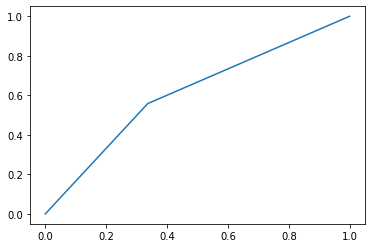

In [95]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
print(accuracy_score(y_test,knn.predict(x_test)))
print(recall_score(y_test,knn.predict(x_test)))
print(confusion_matrix(y_test,knn.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, knn.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,knn.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='KNeighborsClassifier')

0.7759433962264151
0.3333333333333333
[[615 104]
 [ 86  43]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       719
           1       0.29      0.33      0.31       129

    accuracy                           0.78       848
   macro avg       0.58      0.59      0.59       848
weighted avg       0.79      0.78      0.78       848

0.5943439962911451


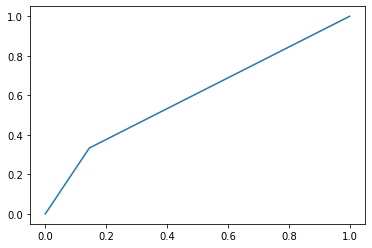

In [96]:
vc=VotingClassifier(estimators=[('rf',rf),('gnb',gnb),('svc',svc),('bag',bag),('xgb',xgb)])
vc.fit(x_train,y_train)
print(accuracy_score(y_test,vc.predict(x_test)))
print(recall_score(y_test,vc.predict(x_test)))
print(confusion_matrix(y_test,vc.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, vc.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,vc.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='VotingClassifier')

# now i am going to use knn imputer class and iterative imputer class they give better result than univariate imputation
### KNN IMPUTER- A new sample is imputed by finding the samples in the training setclosest to it and averages these nearby points to fill in the value.

In [97]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'education_mean',
       'education_median', 'education_mode', 'cigsPerDay_mean',
       'cigsPerDay_median', 'cigsPerDay_mode', 'BPMeds_mean', 'BPMeds_median',
       'BPMeds_mode', 'totChol_mean', 'totChol_median', 'totChol_mode',
       'totChol_mi', 'BMI_mean', 'BMI_median', 'BMI_mode', 'heartRate_mean',
       'heartRate_median', 'heartRate_mode', 'glucose_mean', 'glucose_median',
       'glucose_mode', 'glucose_ran'],
      dtype='object')

In [98]:
data=data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [99]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [100]:
y=data['TenYearCHD']
df=data.drop(columns='TenYearCHD')

In [101]:
from sklearn.impute import KNNImputer
ki=KNNImputer(n_neighbors=6)
array=ki.fit_transform(df)
df=pd.DataFrame(array,columns=df.columns)

In [102]:
df.isnull().sum().sum()

0

In [103]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [104]:
kb=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile',)
df['age']=kb.fit_transform(df[['age']])

In [105]:
array=pt.fit_transform(df)
df=pd.DataFrame(array,columns=df.columns)

In [106]:
l=['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
for i in l:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df[i]=np.where(df[i]>upper_limit,upper_limit,
                np.where(df[i]<lower_limit,lower_limit,df[i]))

In [107]:
pca=PCA(5)
df=pca.fit_transform(df)

In [108]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=.2,random_state=2,stratify=y)

0.6344339622641509
0.689922480620155
[[449 270]
 [ 40  89]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       719
           1       0.25      0.69      0.36       129

    accuracy                           0.63       848
   macro avg       0.58      0.66      0.55       848
weighted avg       0.82      0.63      0.69       848

0.6572004614505504


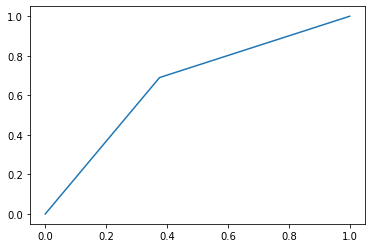

In [109]:
ee=EasyEnsembleClassifier(random_state=42)
ee.fit(x_train,y_train)
print(accuracy_score(y_test,ee.predict(x_test)))
print(recall_score(y_test,ee.predict(x_test)))
print(confusion_matrix(y_test,ee.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ee.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,ee.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='EasyEnsembleClassifier')

# iterative imputation : it a technique in which missing values are imputed by prediction i.e Missing values replaced with iteratively estimated values.

In [110]:
y=data['TenYearCHD']
x=data.drop(columns='TenYearCHD')

In [111]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii=IterativeImputer()
array=ii.fit_transform(x)
x=pd.DataFrame(array,columns=x.columns)

In [112]:
kb=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile',)
x['age']=kb.fit_transform(x[['age']])


In [113]:
pt=PowerTransformer()
array=pt.fit_transform(x)
x=pd.DataFrame(array,columns=x.columns)

In [114]:
l=['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
for i in l:
    q1=x[i].quantile(.25)
    q3=x[i].quantile(.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    x[i]=np.where(x[i]>upper_limit,upper_limit,
                np.where(x[i]<lower_limit,lower_limit,x[i]))

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2,stratify=y)

0.6285377358490566
0.6744186046511628
[[446 273]
 [ 42  87]]
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       719
           1       0.24      0.67      0.36       129

    accuracy                           0.63       848
   macro avg       0.58      0.65      0.55       848
weighted avg       0.81      0.63      0.68       848

0.6473622925898372


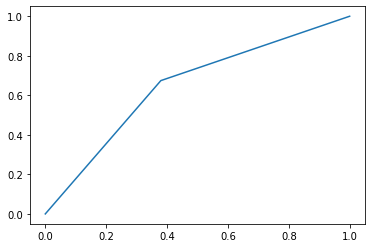

In [116]:
ee=EasyEnsembleClassifier(random_state=42)
ee.fit(x_train,y_train)
print(accuracy_score(y_test,ee.predict(x_test)))
print(recall_score(y_test,ee.predict(x_test)))
print(confusion_matrix(y_test,ee.predict(x_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ee.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,ee.predict(x_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='EasyEnsembleClassifier')